In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dataset import OcelotSpaceChargeQuadrupoleDataset
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = OcelotSpaceChargeQuadrupoleDataset(stage="validation", normalize=False)

In [3]:
dataset.outgoing_deltas.numpy().min(axis=0), dataset.outgoing_deltas.numpy().max(axis=0)

(array([-0.00046245, -0.00258278, -0.00032326, -0.00328531, -0.00023893,
        -0.00704961], dtype=float32),
 array([0.0578966 , 0.31941584, 0.0399932 , 0.3922863 , 0.01754066,
        0.48535192], dtype=float32))

In [4]:
energies = []
charges = []
sigma_xs = []
sigma_xps = []
sigma_ys = []
sigma_yps = []
sigma_ss = []
sigma_ps = []

sigma_x_errors = []
sigma_xp_errors = []
sigma_y_errors = []
sigma_yp_errors = []
sigma_s_errors = []
sigma_p_errors = []
for (incoming, controls), outgoing_deltas in dataset:
    energies.append(incoming[7].item())
    charges.append(incoming[6].item())
    sigma_xs.append(incoming[0].item())
    sigma_xps.append(incoming[1].item())
    sigma_ys.append(incoming[2].item())
    sigma_yps.append(incoming[3].item())
    sigma_ss.append(incoming[4].item())
    sigma_ps.append(incoming[5].item())

    sigma_x_errors.append(outgoing_deltas[0].item())
    sigma_xp_errors.append(outgoing_deltas[1].item())
    sigma_y_errors.append(outgoing_deltas[2].item())
    sigma_yp_errors.append(outgoing_deltas[3].item())
    sigma_s_errors.append(outgoing_deltas[4].item())
    sigma_p_errors.append(outgoing_deltas[5].item())

In [5]:
np.array(sigma_xs).min(), np.array(sigma_xs).mean(), np.array(sigma_xs).max()

(1.0057362487714272e-05, 0.0002266944033690379, 0.0010006788652390242)

In [6]:
np.array(sigma_x_errors).min(), np.array(sigma_x_errors).mean(), np.array(
    sigma_x_errors
).max()

(-0.00046245165867730975, 0.0009403449613631665, 0.05789659917354584)

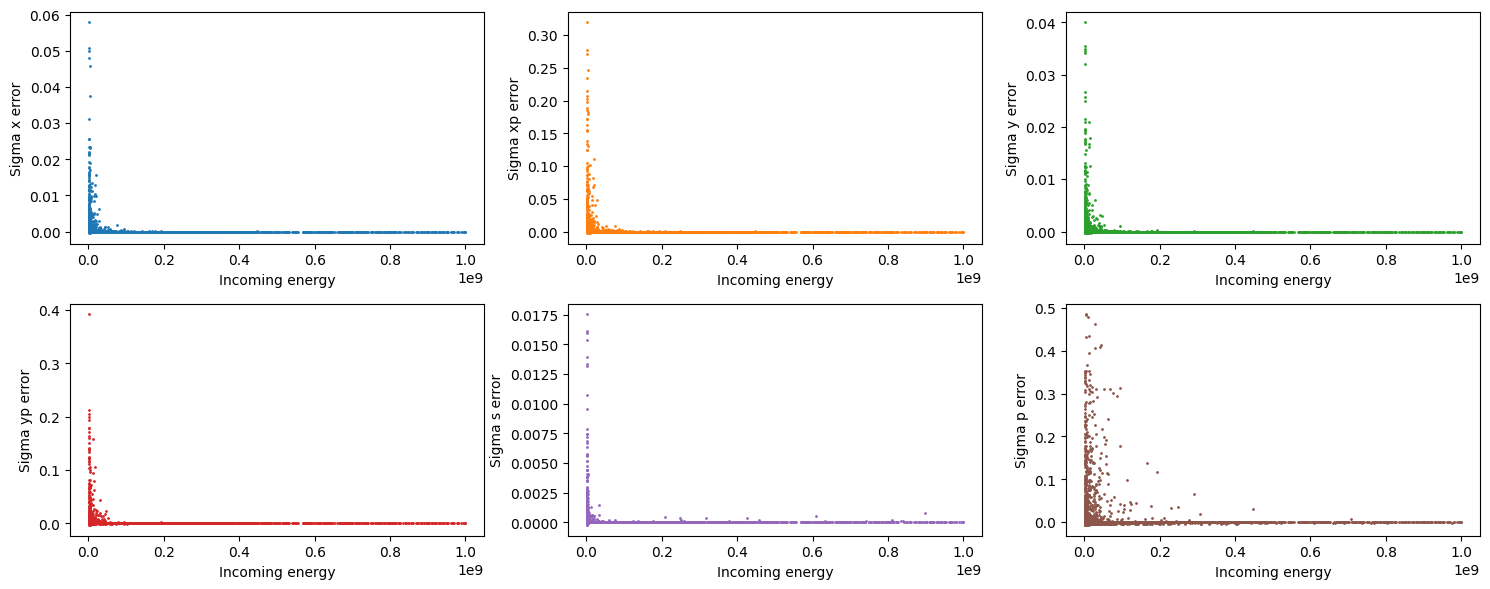

In [7]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 3, 1)
plt.scatter(energies, sigma_x_errors, s=1, c="tab:blue")
plt.xlabel("Incoming energy")
plt.ylabel("Sigma x error")
plt.subplot(2, 3, 2)
plt.scatter(energies, sigma_xp_errors, s=1, c="tab:orange")
plt.xlabel("Incoming energy")
plt.ylabel("Sigma xp error")
plt.subplot(2, 3, 3)
plt.scatter(energies, sigma_y_errors, s=1, c="tab:green")
plt.xlabel("Incoming energy")
plt.ylabel("Sigma y error")
plt.subplot(2, 3, 4)
plt.scatter(energies, sigma_yp_errors, s=1, c="tab:red")
plt.xlabel("Incoming energy")
plt.ylabel("Sigma yp error")
plt.subplot(2, 3, 5)
plt.scatter(energies, sigma_s_errors, s=1, c="tab:purple")
plt.xlabel("Incoming energy")
plt.ylabel("Sigma s error")
plt.subplot(2, 3, 6)
plt.scatter(energies, sigma_p_errors, s=1, c="tab:brown")
plt.xlabel("Incoming energy")
plt.ylabel("Sigma p error")
plt.tight_layout()
plt.show()

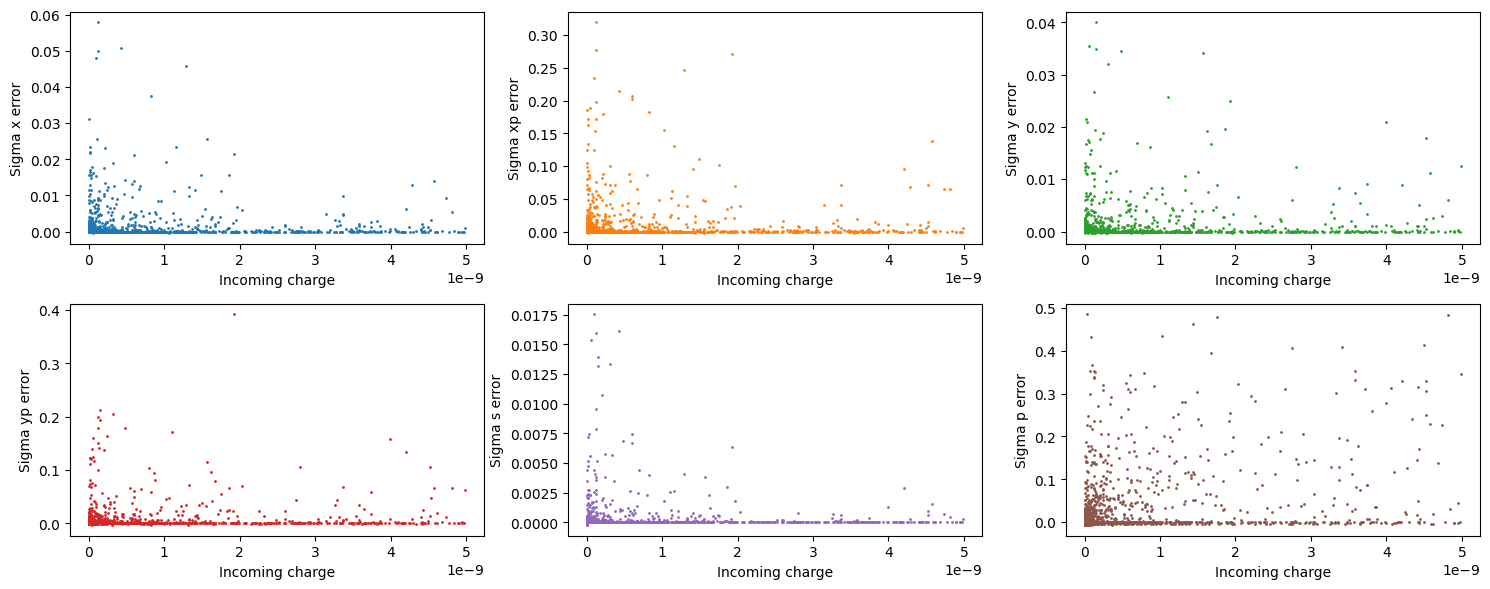

In [8]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 3, 1)
plt.scatter(charges, sigma_x_errors, s=1, c="tab:blue")
plt.xlabel("Incoming charge")
plt.ylabel("Sigma x error")
plt.subplot(2, 3, 2)
plt.scatter(charges, sigma_xp_errors, s=1, c="tab:orange")
plt.xlabel("Incoming charge")
plt.ylabel("Sigma xp error")
plt.subplot(2, 3, 3)
plt.scatter(charges, sigma_y_errors, s=1, c="tab:green")
plt.xlabel("Incoming charge")
plt.ylabel("Sigma y error")
plt.subplot(2, 3, 4)
plt.scatter(charges, sigma_yp_errors, s=1, c="tab:red")
plt.xlabel("Incoming charge")
plt.ylabel("Sigma yp error")
plt.subplot(2, 3, 5)
plt.scatter(charges, sigma_s_errors, s=1, c="tab:purple")
plt.xlabel("Incoming charge")
plt.ylabel("Sigma s error")
plt.subplot(2, 3, 6)
plt.scatter(charges, sigma_p_errors, s=1, c="tab:brown")
plt.xlabel("Incoming charge")
plt.ylabel("Sigma p error")
plt.tight_layout()
plt.show()

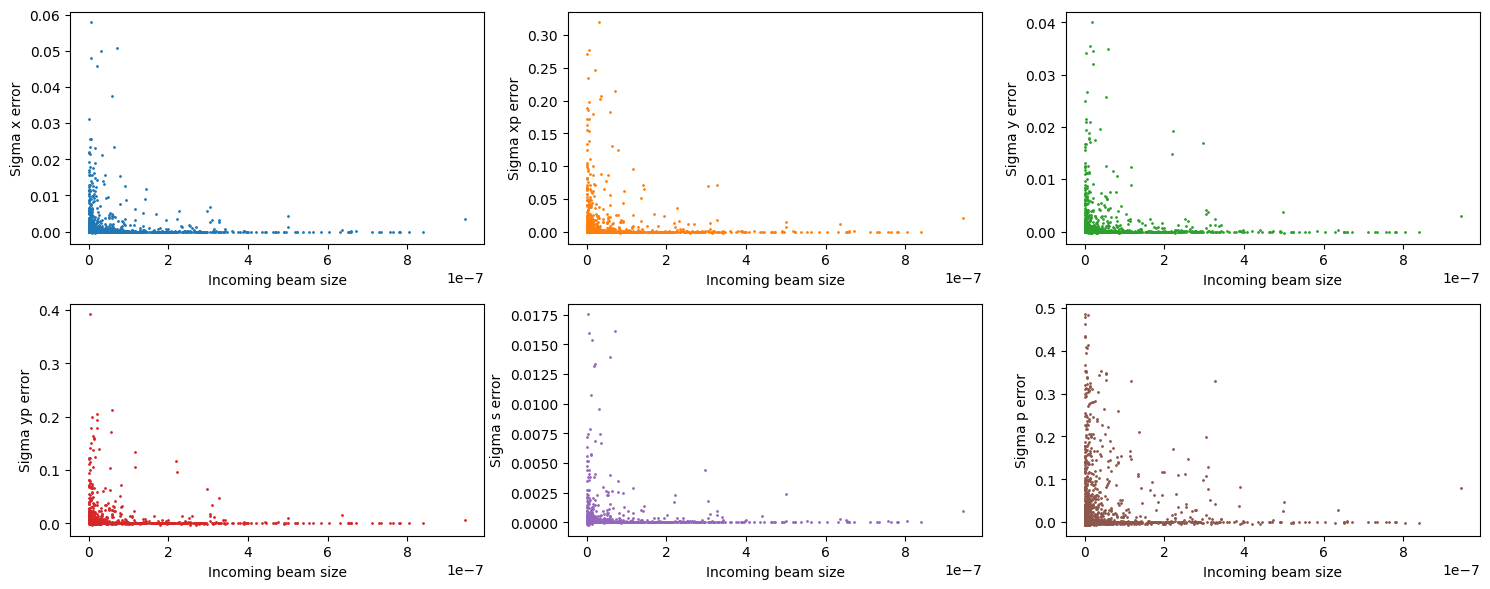

In [9]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 3, 1)
plt.scatter(
    [sx * sy for sx, sy in zip(sigma_xs, sigma_ys)], sigma_x_errors, s=1, c="tab:blue"
)
plt.xlabel("Incoming beam size")
plt.ylabel("Sigma x error")
plt.subplot(2, 3, 2)
plt.scatter(
    [sx * sy for sx, sy in zip(sigma_xs, sigma_ys)],
    sigma_xp_errors,
    s=1,
    c="tab:orange",
)
plt.xlabel("Incoming beam size")
plt.ylabel("Sigma xp error")
plt.subplot(2, 3, 3)
plt.scatter(
    [sx * sy for sx, sy in zip(sigma_xs, sigma_ys)], sigma_y_errors, s=1, c="tab:green"
)
plt.xlabel("Incoming beam size")
plt.ylabel("Sigma y error")
plt.subplot(2, 3, 4)
plt.scatter(
    [sx * sy for sx, sy in zip(sigma_xs, sigma_ys)], sigma_yp_errors, s=1, c="tab:red"
)
plt.xlabel("Incoming beam size")
plt.ylabel("Sigma yp error")
plt.subplot(2, 3, 5)
plt.scatter(
    [sx * sy for sx, sy in zip(sigma_xs, sigma_ys)], sigma_s_errors, s=1, c="tab:purple"
)
plt.xlabel("Incoming beam size")
plt.ylabel("Sigma s error")
plt.subplot(2, 3, 6)
plt.scatter(
    [sx * sy for sx, sy in zip(sigma_xs, sigma_ys)], sigma_p_errors, s=1, c="tab:brown"
)
plt.xlabel("Incoming beam size")
plt.ylabel("Sigma p error")
plt.tight_layout()
plt.show()

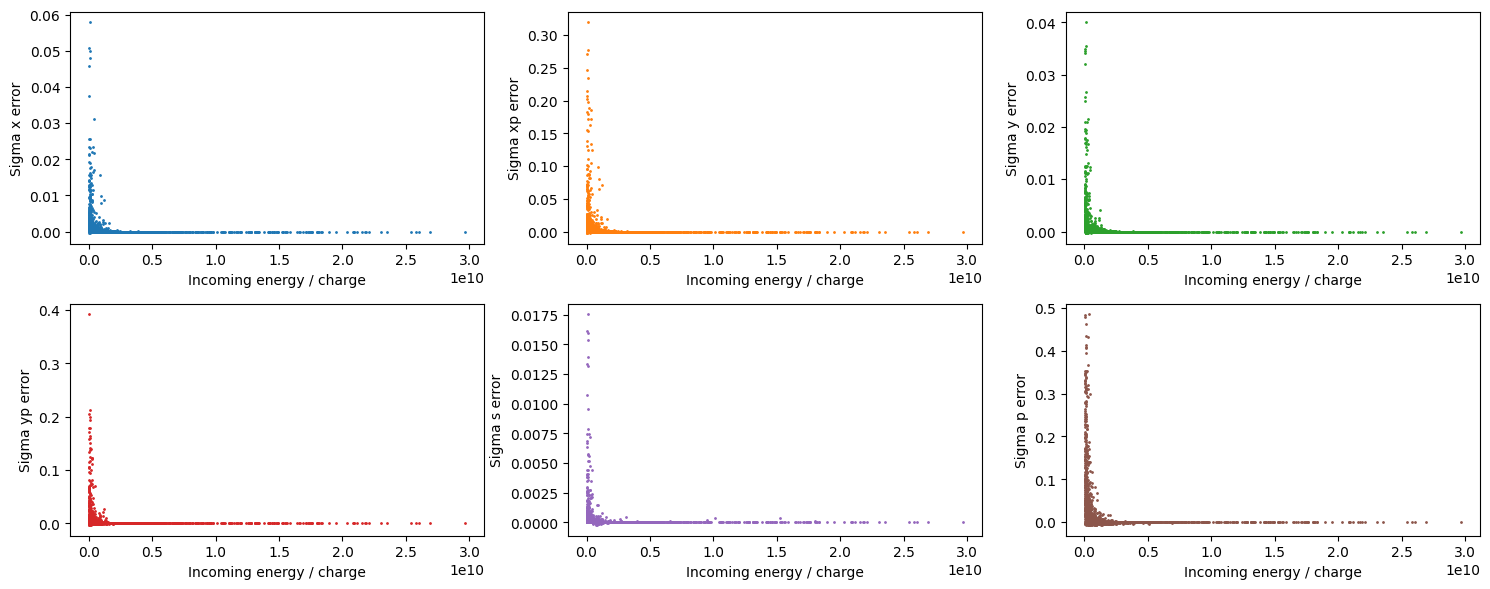

In [10]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 3, 1)
plt.scatter(
    np.sqrt(np.array(energies) / np.array(charges)), sigma_x_errors, s=1, c="tab:blue"
)
plt.xlabel("Incoming energy / charge")
plt.ylabel("Sigma x error")
plt.subplot(2, 3, 2)
plt.scatter(
    np.sqrt(np.array(energies) / np.array(charges)),
    sigma_xp_errors,
    s=1,
    c="tab:orange",
)
plt.xlabel("Incoming energy / charge")
plt.ylabel("Sigma xp error")
plt.subplot(2, 3, 3)
plt.scatter(
    np.sqrt(np.array(energies) / np.array(charges)), sigma_y_errors, s=1, c="tab:green"
)
plt.xlabel("Incoming energy / charge")
plt.ylabel("Sigma y error")
plt.subplot(2, 3, 4)
plt.scatter(
    np.sqrt(np.array(energies) / np.array(charges)), sigma_yp_errors, s=1, c="tab:red"
)
plt.xlabel("Incoming energy / charge")
plt.ylabel("Sigma yp error")
plt.subplot(2, 3, 5)
plt.scatter(
    np.sqrt(np.array(energies) / np.array(charges)), sigma_s_errors, s=1, c="tab:purple"
)
plt.xlabel("Incoming energy / charge")
plt.ylabel("Sigma s error")
plt.subplot(2, 3, 6)
plt.scatter(
    np.sqrt(np.array(energies) / np.array(charges)), sigma_p_errors, s=1, c="tab:brown"
)
plt.xlabel("Incoming energy / charge")
plt.ylabel("Sigma p error")
plt.tight_layout()
plt.show()

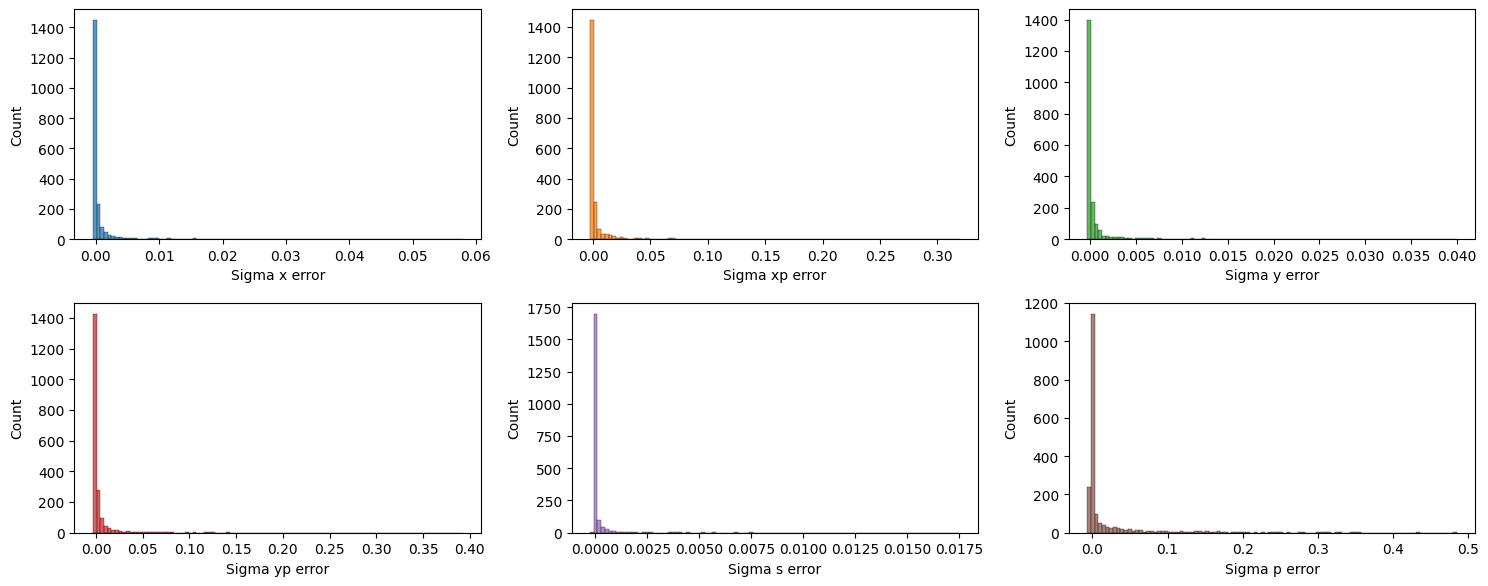

In [11]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 3, 1)
sns.histplot(x=sigma_x_errors, bins=100, color="tab:blue")
plt.xlabel("Sigma x error")
plt.subplot(2, 3, 2)
sns.histplot(x=sigma_xp_errors, bins=100, color="tab:orange")
plt.xlabel("Sigma xp error")
plt.subplot(2, 3, 3)
sns.histplot(x=sigma_y_errors, bins=100, color="tab:green")
plt.xlabel("Sigma y error")
plt.subplot(2, 3, 4)
sns.histplot(x=sigma_yp_errors, bins=100, color="tab:red")
plt.xlabel("Sigma yp error")
plt.subplot(2, 3, 5)
sns.histplot(x=sigma_s_errors, bins=100, color="tab:purple")
plt.xlabel("Sigma s error")
plt.subplot(2, 3, 6)
sns.histplot(x=sigma_p_errors, bins=100, color="tab:brown")
plt.xlabel("Sigma p error")
plt.tight_layout()
plt.show()

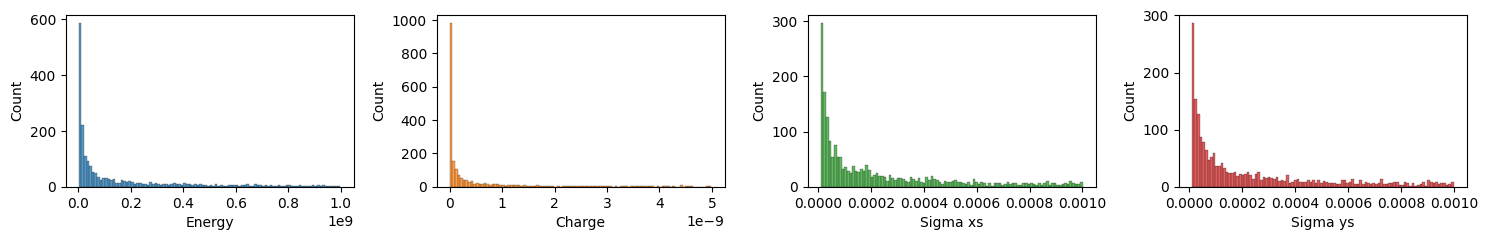

In [12]:
plt.figure(figsize=(15, 2.5))

plt.subplot(1, 4, 1)
sns.histplot(x=energies, bins=100, color="tab:blue")
plt.xlabel("Energy")
plt.subplot(1, 4, 2)
sns.histplot(x=charges, bins=100, color="tab:orange")
plt.xlabel("Charge")
plt.subplot(1, 4, 3)
sns.histplot(x=sigma_xs, bins=100, color="tab:green")
plt.xlabel("Sigma xs")
plt.subplot(1, 4, 4)
sns.histplot(x=sigma_ys, bins=100, color="tab:red")
plt.xlabel("Sigma ys")
plt.tight_layout()
plt.show()

In [13]:
dataset_normalized = OcelotSpaceChargeQuadrupoleDataset(
    stage="validation", normalize=True
)

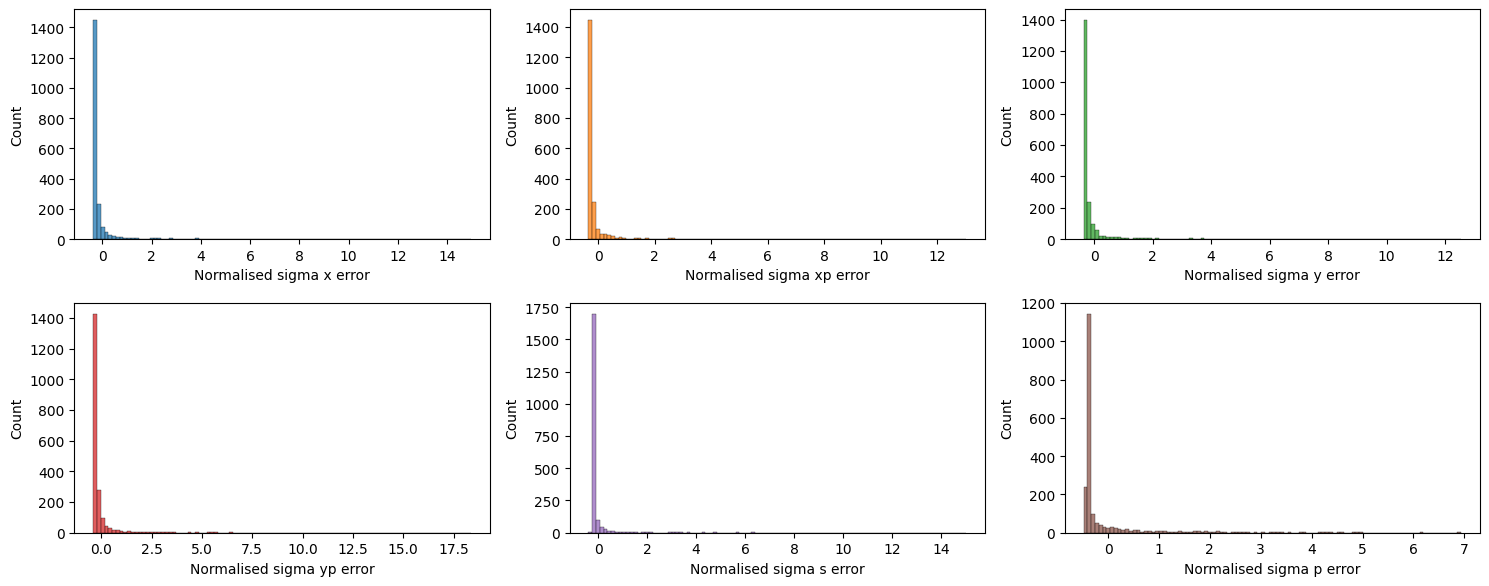

In [14]:
sigma_x_errors_normalized = []
sigma_xp_errors_normalized = []
sigma_y_errors_normalized = []
sigma_yp_errors_normalized = []
sigma_s_errors_normalized = []
sigma_p_errors_normalized = []
for (incoming, controls), outgoing_deltas in dataset_normalized:
    sigma_x_errors_normalized.append(outgoing_deltas[0].item())
    sigma_xp_errors_normalized.append(outgoing_deltas[1].item())
    sigma_y_errors_normalized.append(outgoing_deltas[2].item())
    sigma_yp_errors_normalized.append(outgoing_deltas[3].item())
    sigma_s_errors_normalized.append(outgoing_deltas[4].item())
    sigma_p_errors_normalized.append(outgoing_deltas[5].item())

plt.figure(figsize=(15, 6))

plt.subplot(2, 3, 1)
sns.histplot(x=sigma_x_errors_normalized, bins=100, color="tab:blue")
plt.xlabel("Normalised sigma x error")
plt.subplot(2, 3, 2)
sns.histplot(x=sigma_xp_errors_normalized, bins=100, color="tab:orange")
plt.xlabel("Normalised sigma xp error")
plt.subplot(2, 3, 3)
sns.histplot(x=sigma_y_errors_normalized, bins=100, color="tab:green")
plt.xlabel("Normalised sigma y error")
plt.subplot(2, 3, 4)
sns.histplot(x=sigma_yp_errors_normalized, bins=100, color="tab:red")
plt.xlabel("Normalised sigma yp error")
plt.subplot(2, 3, 5)
sns.histplot(x=sigma_s_errors_normalized, bins=100, color="tab:purple")
plt.xlabel("Normalised sigma s error")
plt.subplot(2, 3, 6)
sns.histplot(x=sigma_p_errors_normalized, bins=100, color="tab:brown")
plt.xlabel("Normalised sigma p error")
plt.tight_layout()
plt.show()

In [15]:
np.array(sigma_x_errors), np.log(np.array(sigma_x_errors))

/var/folders/z8/vzg_1dr50gg1zchydp1styc00000gn/T/ipykernel_18749/3007970701.py:1: RuntimeWarning: divide by zero encountered in log
  np.array(sigma_x_errors), np.log(np.array(sigma_x_errors))
/var/folders/z8/vzg_1dr50gg1zchydp1styc00000gn/T/ipykernel_18749/3007970701.py:1: RuntimeWarning: invalid value encountered in log
  np.array(sigma_x_errors), np.log(np.array(sigma_x_errors))


(array([ 1.03609636e-07, -1.30967237e-10,  4.60073876e-04, ...,
         8.08620825e-07,  9.34673473e-03,  4.57335562e-02]),
 array([-16.0826355 ,          nan,  -7.68412348, ..., -14.02793573,
         -4.67272822,  -3.08492298]))

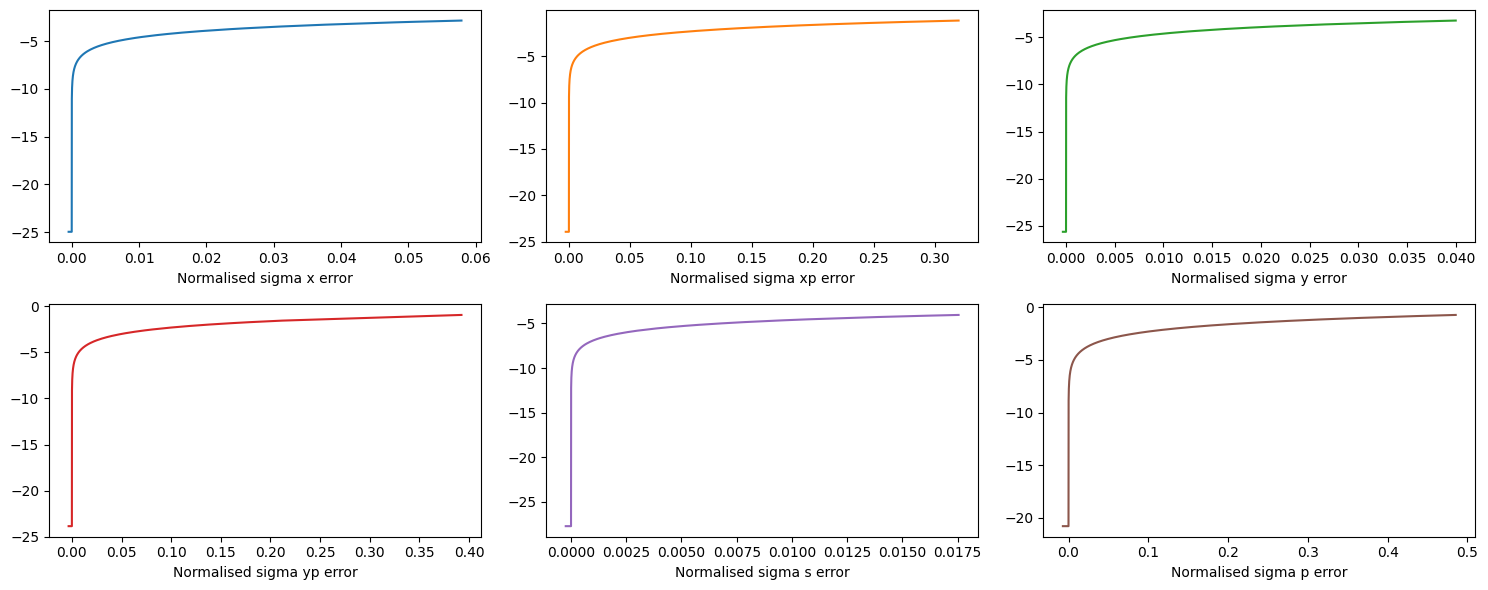

In [16]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 3, 1)
sanitized_sigma_x_errors = np.clip(
    np.sort(np.array(sigma_x_errors)),
    np.min(np.abs(np.array(sigma_x_errors)[np.nonzero(sigma_x_errors)])),
    None,
)
plt.plot(
    np.sort(np.array(sigma_x_errors)),
    np.log(sanitized_sigma_x_errors),
    color="tab:blue",
)
plt.xlabel("Normalised sigma x error")
plt.subplot(2, 3, 2)
sanitized_sigma_xp_errors = np.clip(
    np.sort(np.array(sigma_xp_errors)),
    np.min(np.abs(np.array(sigma_xp_errors)[np.nonzero(sigma_xp_errors)])),
    None,
)
plt.plot(
    np.sort(np.array(sigma_xp_errors)),
    np.log(sanitized_sigma_xp_errors),
    color="tab:orange",
)
plt.xlabel("Normalised sigma xp error")
plt.subplot(2, 3, 3)
sanitized_sigma_y_errors = np.clip(
    np.sort(np.array(sigma_y_errors)),
    np.min(np.abs(np.array(sigma_y_errors)[np.nonzero(sigma_y_errors)])),
    None,
)
plt.plot(
    np.sort(np.array(sigma_y_errors)),
    np.log(sanitized_sigma_y_errors),
    color="tab:green",
)
plt.xlabel("Normalised sigma y error")
plt.subplot(2, 3, 4)
sanitized_sigma_yp_errors = np.clip(
    np.sort(np.array(sigma_yp_errors)),
    np.min(np.abs(np.array(sigma_yp_errors)[np.nonzero(sigma_yp_errors)])),
    None,
)
plt.plot(
    np.sort(np.array(sigma_yp_errors)),
    np.log(sanitized_sigma_yp_errors),
    color="tab:red",
)
plt.xlabel("Normalised sigma yp error")
plt.subplot(2, 3, 5)
sanitized_sigma_s_errors = np.clip(
    np.sort(np.array(sigma_s_errors)),
    np.min(np.abs(np.array(sigma_s_errors)[np.nonzero(sigma_s_errors)])),
    None,
)
plt.plot(
    np.sort(np.array(sigma_s_errors)),
    np.log(sanitized_sigma_s_errors),
    color="tab:purple",
)
plt.xlabel("Normalised sigma s error")
plt.subplot(2, 3, 6)
sanitized_sigma_p_errors = np.clip(
    np.sort(np.array(sigma_p_errors)),
    np.min(np.abs(np.array(sigma_p_errors)[np.nonzero(sigma_p_errors)])),
    None,
)
plt.plot(
    np.sort(np.array(sigma_p_errors)),
    np.log(sanitized_sigma_p_errors),
    color="tab:brown",
)
plt.xlabel("Normalised sigma p error")
plt.tight_layout()
plt.show()

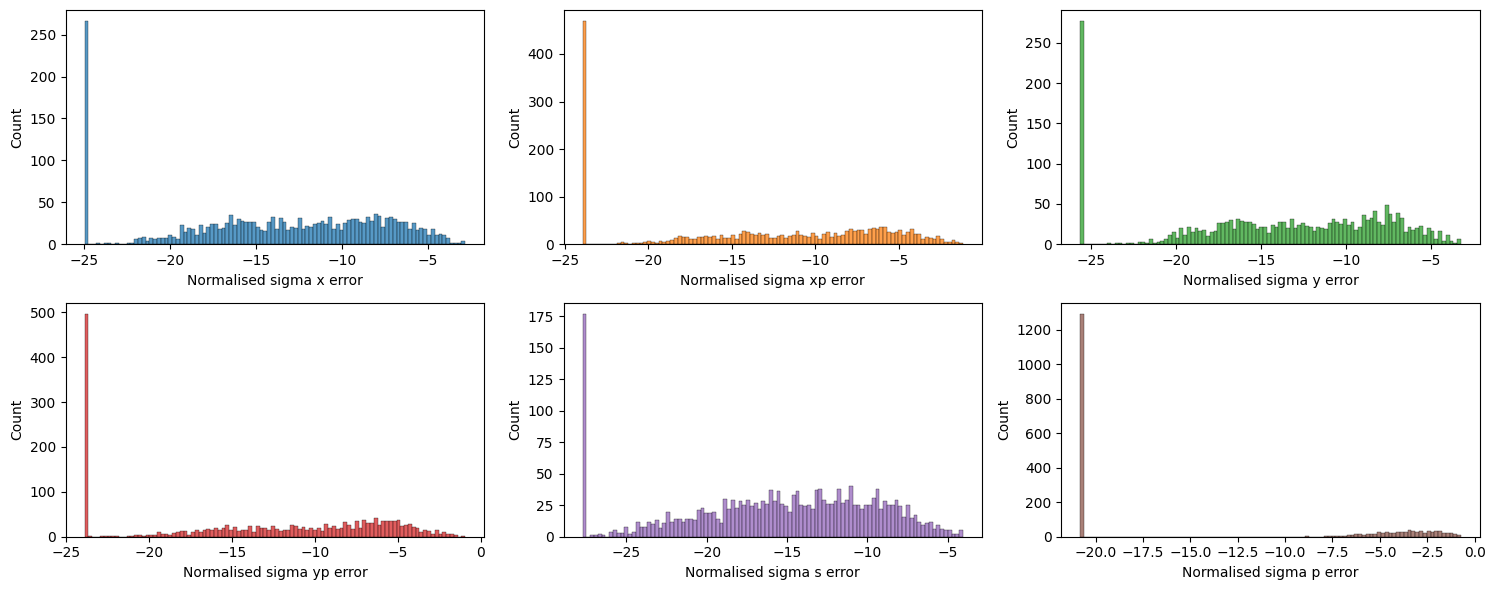

In [17]:
plt.figure(figsize=(15, 6))

sanitized_sigma_x_errors = np.clip(
    np.sort(np.array(sigma_x_errors)),
    np.min(np.abs(np.array(sigma_x_errors)[np.nonzero(sigma_x_errors)])),
    None,
)
sanitized_sigma_xp_errors = np.clip(
    np.sort(np.array(sigma_xp_errors)),
    np.min(np.abs(np.array(sigma_xp_errors)[np.nonzero(sigma_xp_errors)])),
    None,
)
sanitized_sigma_y_errors = np.clip(
    np.sort(np.array(sigma_y_errors)),
    np.min(np.abs(np.array(sigma_y_errors)[np.nonzero(sigma_y_errors)])),
    None,
)
sanitized_sigma_yp_errors = np.clip(
    np.sort(np.array(sigma_yp_errors)),
    np.min(np.abs(np.array(sigma_yp_errors)[np.nonzero(sigma_yp_errors)])),
    None,
)
sanitized_sigma_s_errors = np.clip(
    np.sort(np.array(sigma_s_errors)),
    np.min(np.abs(np.array(sigma_s_errors)[np.nonzero(sigma_s_errors)])),
    None,
)
sanitized_sigma_p_errors = np.clip(
    np.sort(np.array(sigma_p_errors)),
    np.min(np.abs(np.array(sigma_p_errors)[np.nonzero(sigma_p_errors)])),
    None,
)

plt.subplot(2, 3, 1)
sns.histplot(x=np.log(sanitized_sigma_x_errors), bins=100, color="tab:blue")
plt.xlabel("Normalised sigma x error")
plt.subplot(2, 3, 2)
sns.histplot(x=np.log(sanitized_sigma_xp_errors), bins=100, color="tab:orange")
plt.xlabel("Normalised sigma xp error")
plt.subplot(2, 3, 3)
sns.histplot(x=np.log(sanitized_sigma_y_errors), bins=100, color="tab:green")
plt.xlabel("Normalised sigma y error")
plt.subplot(2, 3, 4)
sns.histplot(x=np.log(sanitized_sigma_yp_errors), bins=100, color="tab:red")
plt.xlabel("Normalised sigma yp error")
plt.subplot(2, 3, 5)
sns.histplot(x=np.log(sanitized_sigma_s_errors), bins=100, color="tab:purple")
plt.xlabel("Normalised sigma s error")
plt.subplot(2, 3, 6)
sns.histplot(x=np.log(sanitized_sigma_p_errors), bins=100, color="tab:brown")
plt.xlabel("Normalised sigma p error")
plt.tight_layout()
plt.show()

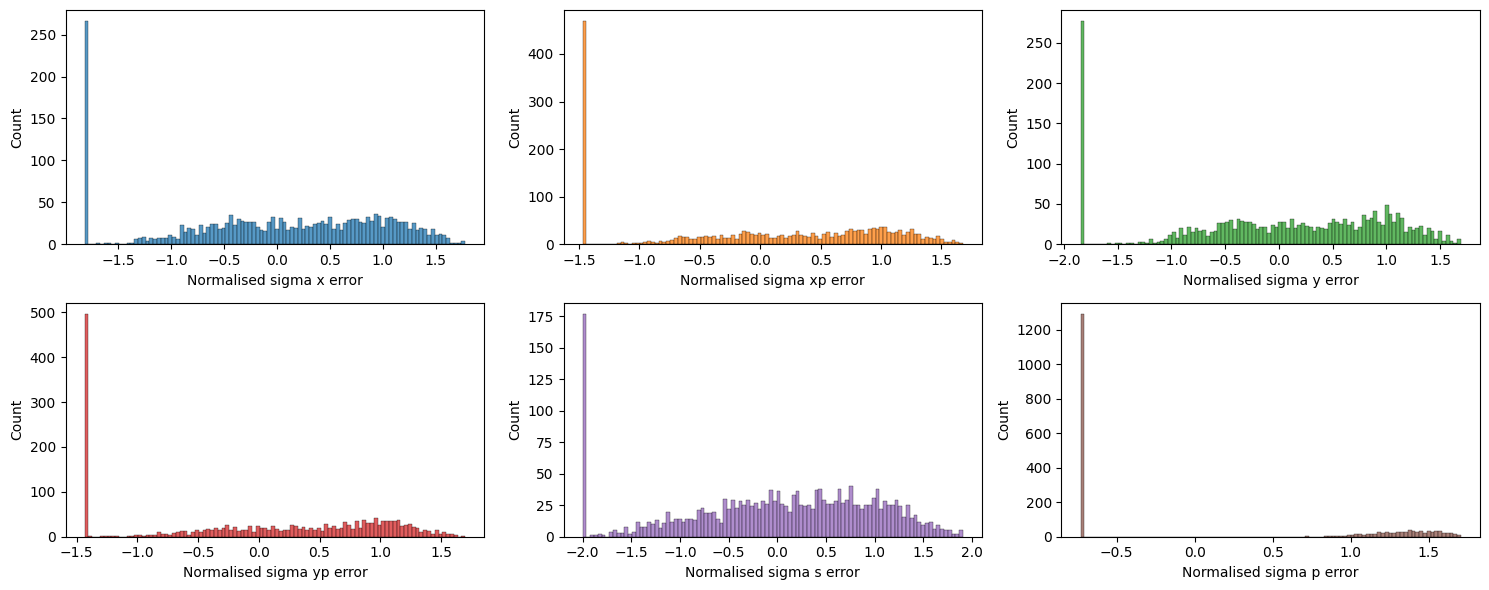

In [18]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 3, 1)
scaler = StandardScaler()
sns.histplot(
    x=scaler.fit_transform(np.log(sanitized_sigma_x_errors).reshape(-1, 1))[:, 0],
    bins=100,
    color="tab:blue",
)
plt.xlabel("Normalised sigma x error")
plt.subplot(2, 3, 2)
scaler = StandardScaler()
sns.histplot(
    x=scaler.fit_transform(np.log(sanitized_sigma_xp_errors).reshape(-1, 1))[:, 0],
    bins=100,
    color="tab:orange",
)
plt.xlabel("Normalised sigma xp error")
plt.subplot(2, 3, 3)
scaler = StandardScaler()
sns.histplot(
    x=scaler.fit_transform(np.log(sanitized_sigma_y_errors).reshape(-1, 1))[:, 0],
    bins=100,
    color="tab:green",
)
plt.xlabel("Normalised sigma y error")
plt.subplot(2, 3, 4)
scaler = StandardScaler()
sns.histplot(
    x=scaler.fit_transform(np.log(sanitized_sigma_yp_errors).reshape(-1, 1))[:, 0],
    bins=100,
    color="tab:red",
)
plt.xlabel("Normalised sigma yp error")
plt.subplot(2, 3, 5)
scaler = StandardScaler()
sns.histplot(
    x=scaler.fit_transform(np.log(sanitized_sigma_s_errors).reshape(-1, 1))[:, 0],
    bins=100,
    color="tab:purple",
)
plt.xlabel("Normalised sigma s error")
plt.subplot(2, 3, 6)
scaler = StandardScaler()
sns.histplot(
    x=scaler.fit_transform(np.log(sanitized_sigma_p_errors).reshape(-1, 1))[:, 0],
    bins=100,
    color="tab:brown",
)
plt.xlabel("Normalised sigma p error")
plt.tight_layout()
plt.show()

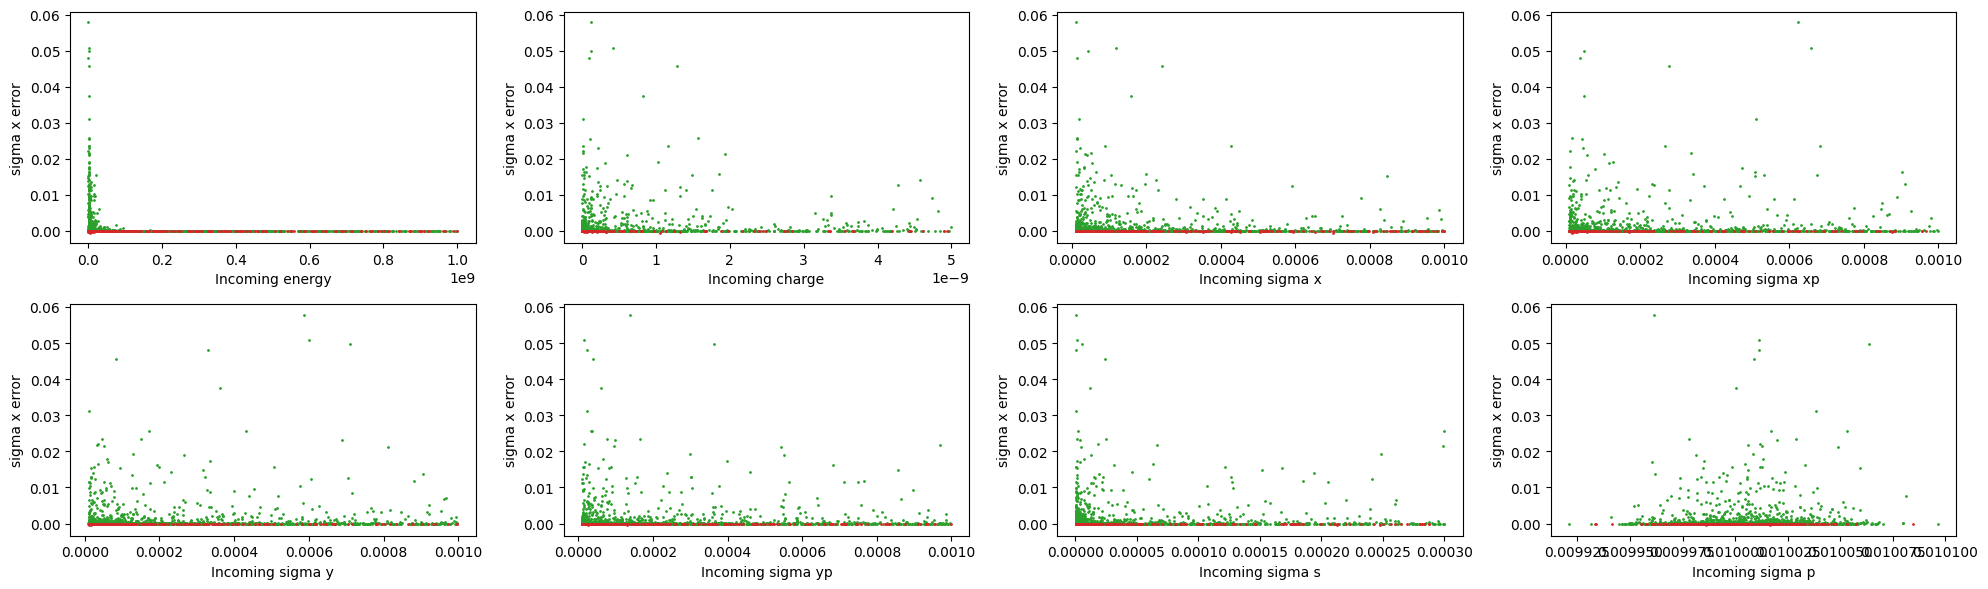

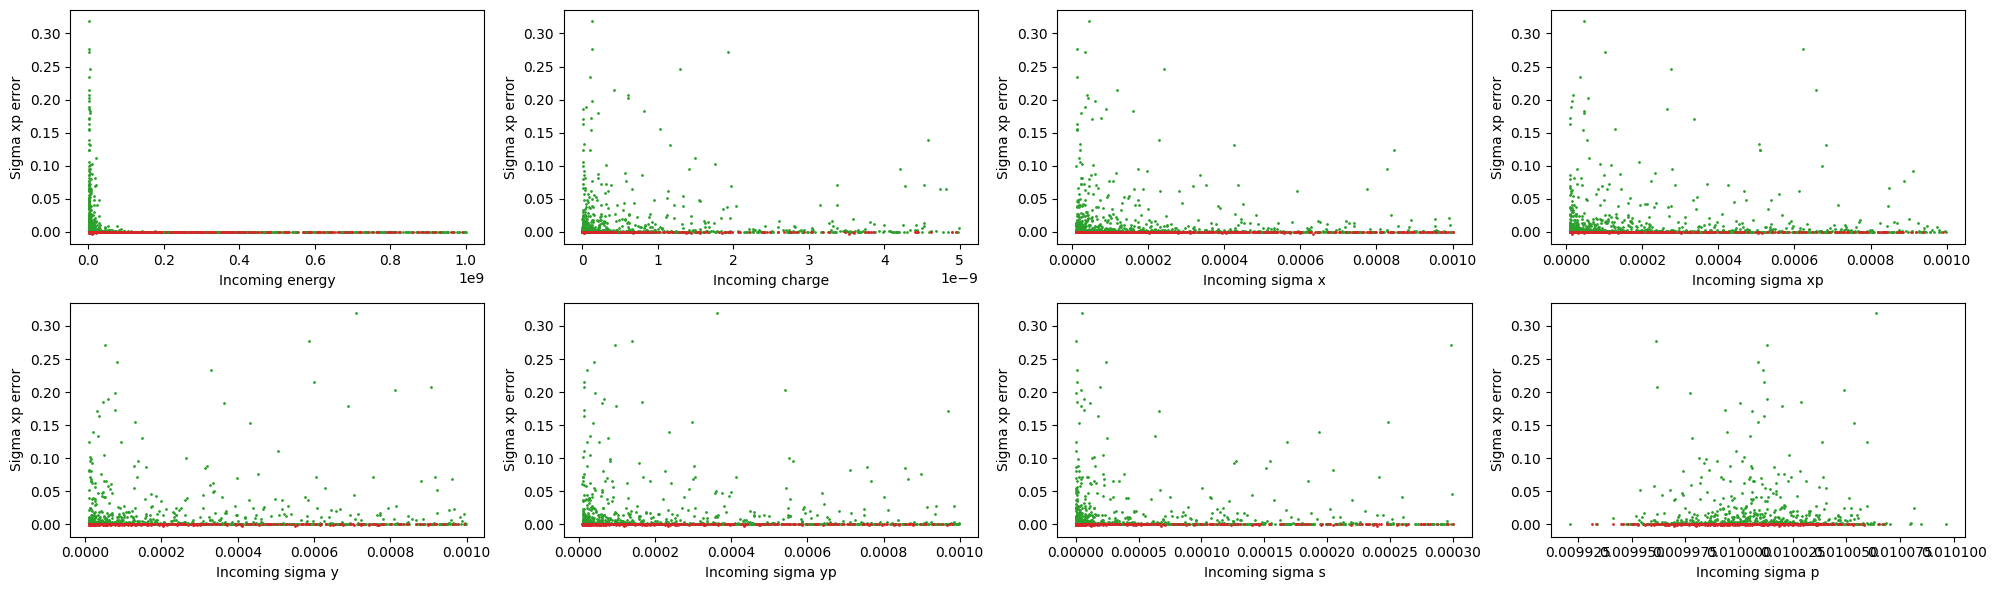

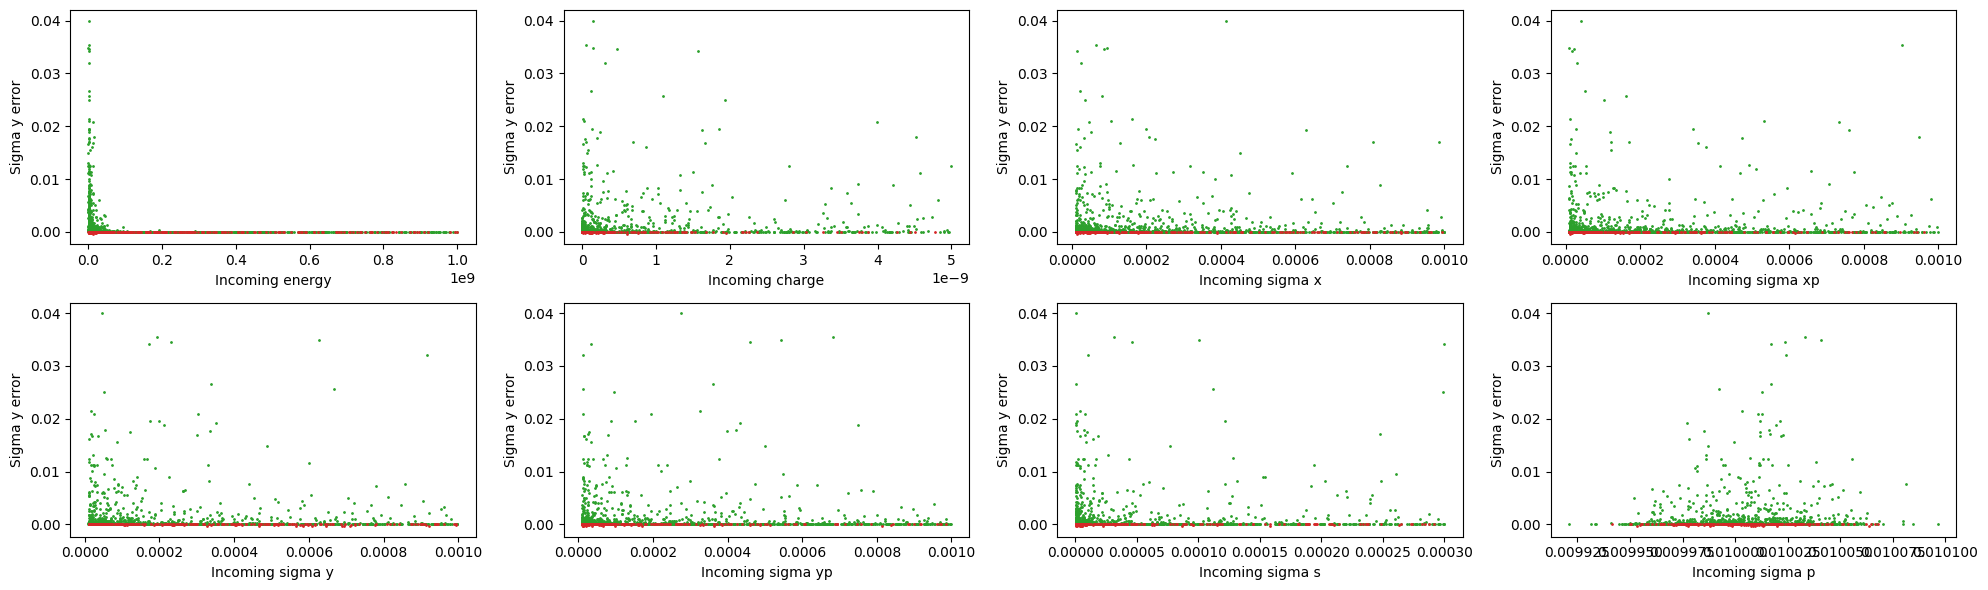

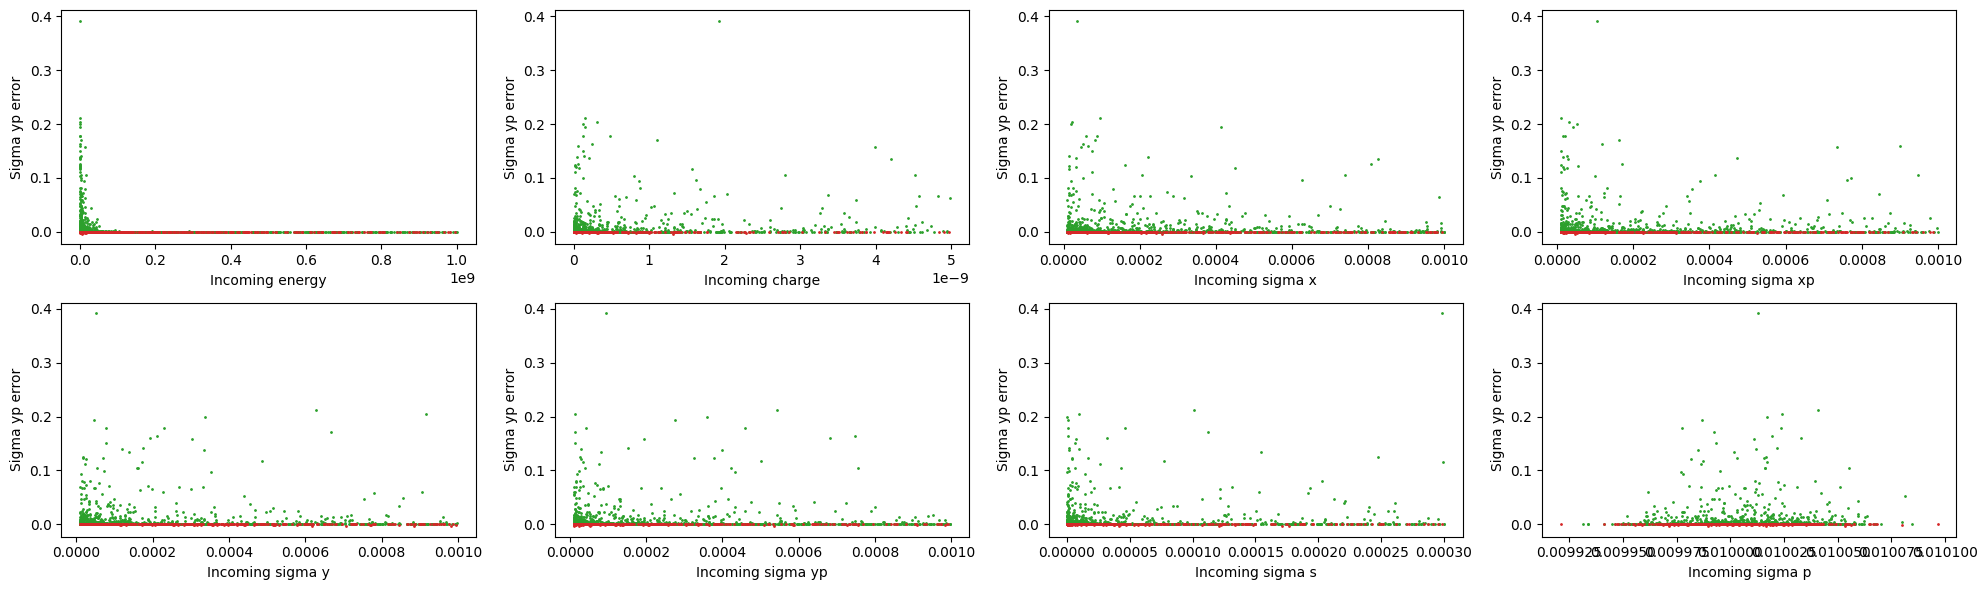

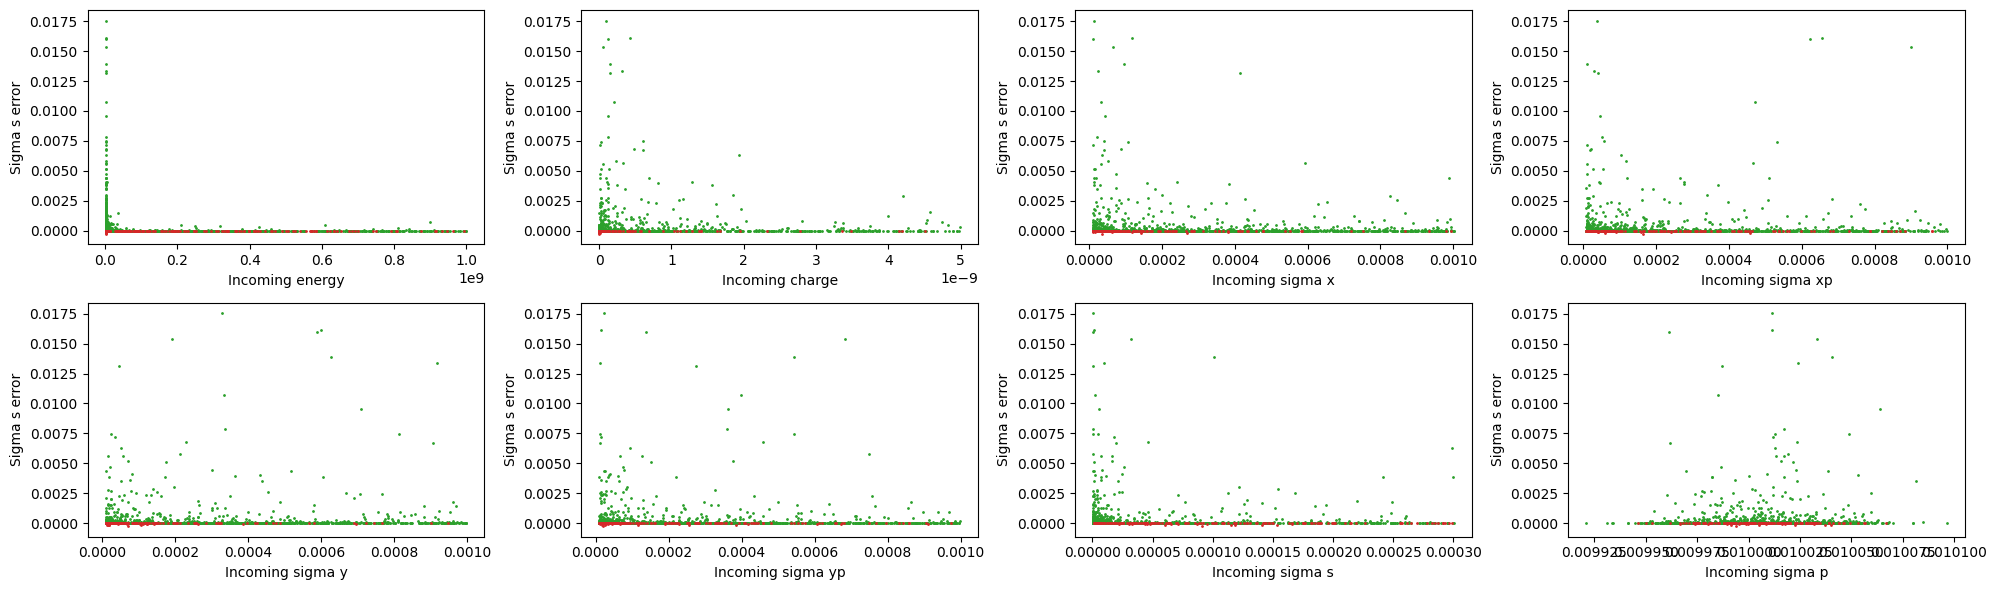

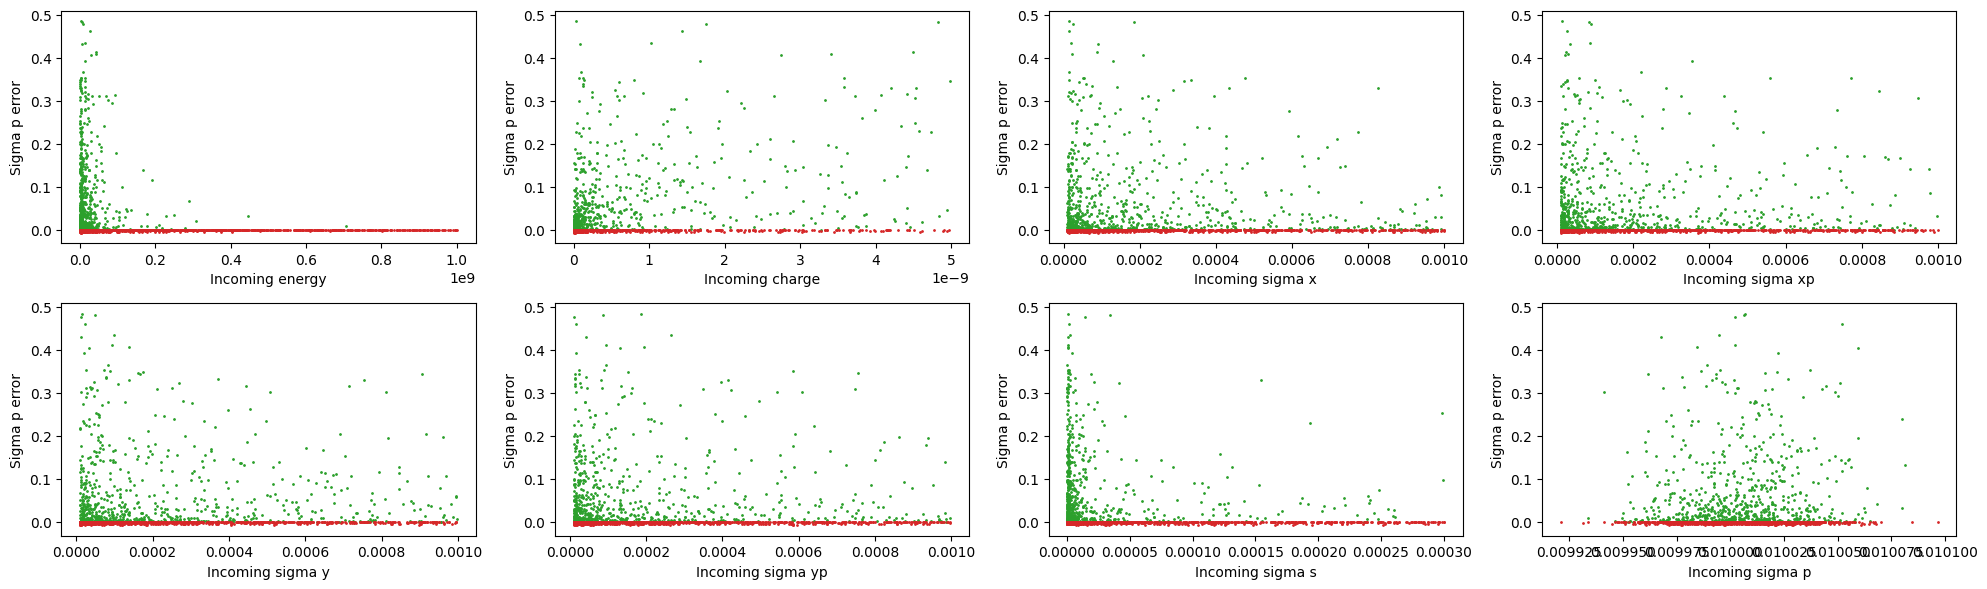

In [19]:
for output_component, name in zip(
    [
        sigma_x_errors,
        sigma_xp_errors,
        sigma_y_errors,
        sigma_yp_errors,
        sigma_s_errors,
        sigma_p_errors,
    ],
    [
        "sigma x error",
        "Sigma xp error",
        "Sigma y error",
        "Sigma yp error",
        "Sigma s error",
        "Sigma p error",
    ],
):
    component_array = np.array(output_component)

    plt.figure(figsize=(20, 6))
    plt.subplot(2, 4, 1)
    energies_array = np.array(energies)
    plt.scatter(
        energies_array[component_array > 0],
        component_array[component_array > 0],
        s=1,
        c="tab:green",
    )
    plt.scatter(
        energies_array[component_array <= 0],
        component_array[component_array <= 0],
        s=1,
        c="tab:red",
    )
    plt.xlabel("Incoming energy")
    plt.ylabel(name)
    plt.subplot(2, 4, 2)
    charges_array = np.array(charges)
    plt.scatter(
        charges_array[component_array > 0],
        component_array[component_array > 0],
        s=1,
        c="tab:green",
    )
    plt.scatter(
        charges_array[component_array <= 0],
        component_array[component_array <= 0],
        s=1,
        c="tab:red",
    )
    plt.xlabel("Incoming charge")
    plt.ylabel(name)
    plt.subplot(2, 4, 3)
    sigma_xs_array = np.array(sigma_xs)
    plt.scatter(
        sigma_xs_array[component_array > 0],
        component_array[component_array > 0],
        s=1,
        c="tab:green",
    )
    plt.scatter(
        sigma_xs_array[component_array <= 0],
        component_array[component_array <= 0],
        s=1,
        c="tab:red",
    )
    plt.xlabel("Incoming sigma x")
    plt.ylabel(name)
    plt.subplot(2, 4, 4)
    sigma_xps_array = np.array(sigma_xps)
    plt.scatter(
        sigma_xps_array[component_array > 0],
        component_array[component_array > 0],
        s=1,
        c="tab:green",
    )
    plt.scatter(
        sigma_xps_array[component_array <= 0],
        component_array[component_array <= 0],
        s=1,
        c="tab:red",
    )
    plt.xlabel("Incoming sigma xp")
    plt.ylabel(name)
    plt.subplot(2, 4, 5)
    sigma_ys_array = np.array(sigma_ys)
    plt.scatter(
        sigma_ys_array[component_array > 0],
        component_array[component_array > 0],
        s=1,
        c="tab:green",
    )
    plt.scatter(
        sigma_ys_array[component_array <= 0],
        component_array[component_array <= 0],
        s=1,
        c="tab:red",
    )
    plt.xlabel("Incoming sigma y")
    plt.ylabel(name)
    plt.subplot(2, 4, 6)
    sigma_yps_array = np.array(sigma_yps)
    plt.scatter(
        sigma_yps_array[component_array > 0],
        component_array[component_array > 0],
        s=1,
        c="tab:green",
    )
    plt.scatter(
        sigma_yps_array[component_array <= 0],
        component_array[component_array <= 0],
        s=1,
        c="tab:red",
    )
    plt.xlabel("Incoming sigma yp")
    plt.ylabel(name)
    plt.subplot(2, 4, 7)
    sigma_ss_array = np.array(sigma_ss)
    plt.scatter(
        sigma_ss_array[component_array > 0],
        component_array[component_array > 0],
        s=1,
        c="tab:green",
    )
    plt.scatter(
        sigma_ss_array[component_array <= 0],
        component_array[component_array <= 0],
        s=1,
        c="tab:red",
    )
    plt.xlabel("Incoming sigma s")
    plt.ylabel(name)
    plt.subplot(2, 4, 8)
    sigma_ps_array = np.array(sigma_ps)
    plt.scatter(
        sigma_ps_array[component_array > 0],
        component_array[component_array > 0],
        s=1,
        c="tab:green",
    )
    plt.scatter(
        sigma_ps_array[component_array <= 0],
        component_array[component_array <= 0],
        s=1,
        c="tab:red",
    )
    plt.xlabel("Incoming sigma p")
    plt.ylabel(name)
    plt.tight_layout()
    plt.show()